In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam

from keras.utils.np_utils import to_categorical
import random

In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [13]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images are not equal"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images are not eq"
assert(X_train.shape[1:] == (28, 28)), "The dimenstion of the training images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimenstions of the test images are not 28x28"

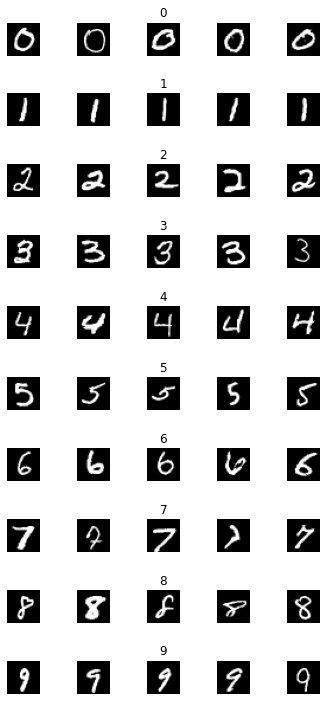

In [19]:
num_of_samples = []

cols = 5
num_of_classes = 10

fig, axs = plt.subplots(nrows = num_of_classes, ncols = cols, figsize=(5, 10))

fig.tight_layout()
for i in range(cols):
    for j in range(num_of_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis('off')
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

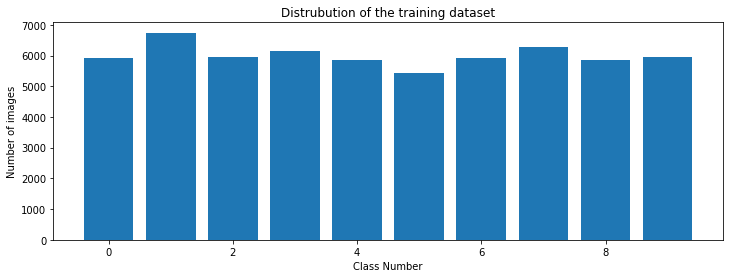

In [21]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title('Distrubution of the training dataset')
plt.xlabel('Class Number')
plt.ylabel('Number of images')

In [22]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [23]:
X_train = X_train/255
X_test = X_test/255

In [24]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [26]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim = num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_of_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model   

In [27]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.6097 - accuracy: 0.8101 - val_loss: 0.2998 - val_accuracy: 0.9087
Epoch 2/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.3519 - accuracy: 0.8993 - val_loss: 0.2568 - val_accuracy: 0.9278
Epoch 3/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.3082 - accuracy: 0.9098 - val_loss: 0.2696 - val_accuracy: 0.9215
Epoch 4/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.2917 - accuracy: 0.9144 - val_loss: 0.2585 - val_accuracy: 0.9198
Epoch 5/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.2746 - accuracy: 0.9178 - val_loss: 0.2188 - val_accuracy: 0.9340
Epoch 6/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.2613 - accuracy: 0.9230 - val_loss: 0.2295 - val_accuracy: 0.9318
Epoch 7/10
54000/54000 [==============================] - 1s 16us/ste

Text(0.5, 0, 'epoch')

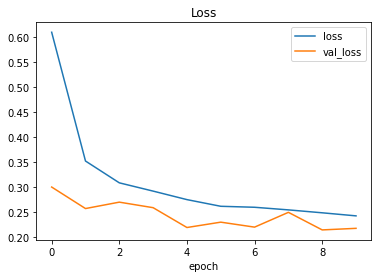

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

{'val_loss': [0.2998053014278412, 0.25675282528003057, 0.26957185914119086, 0.2584972696999709, 0.21880200281739234, 0.22951929767926535, 0.21957016711433727, 0.2491659308473269, 0.21398887087901433, 0.2171522947649161], 'val_accuracy': [0.9086666703224182, 0.9278333187103271, 0.921500027179718, 0.9198333621025085, 0.9340000152587891, 0.9318333268165588, 0.9340000152587891, 0.9241666793823242, 0.9375, 0.9311666488647461], 'loss': [0.6096580553937841, 0.35189892655169525, 0.30822507805294463, 0.291666767001152, 0.27464221837343994, 0.2612899932320471, 0.25931797452546934, 0.25408212793646034, 0.24824878794175606, 0.24210617053839895], 'accuracy': [0.8100741, 0.89925927, 0.90977776, 0.91444445, 0.9178333, 0.923, 0.9232407, 0.92642593, 0.9265, 0.92825925]}


Text(0.5, 0, 'epoch')

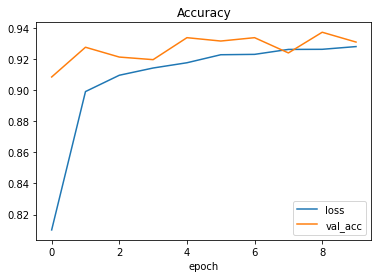

In [33]:
print(history.history)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [42]:
from PIL import Image
import cv2

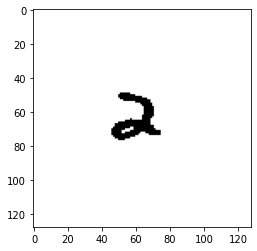

In [55]:
img = Image.open('../MNIST_test_data/2_1.png')
plt.imshow(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

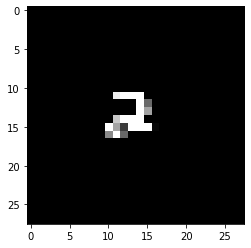

In [56]:
img_array = np.array(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)

plt.imshow(image, cmap=plt.get_cmap('gray'))
print(image)

In [57]:
image = image/255
image = image.reshape(1, 784)

In [59]:
prediction = model.predict_classes(image)
print('Predicted digit:',str(prediction))

Predicted digit: [4]
